In [1]:
cd /home/roberto/Documents/Carrera/romain_ic/wavemixing_project/src

/home/roberto/Documents/Carrera/romain_ic/wavemixing_project/src


In [2]:
import os
import sys

sys.path.insert(0, os.path.abspath("./post_processing/local_calculations"))
sys.path.insert(0, os.path.abspath("./helper_functions/cloud"))
sys.path.insert(0, os.path.abspath("./file_manager"))
sys.path.insert(0, os.path.abspath("./hamiltonian_builder"))
sys.path.insert(0, os.path.abspath("./correlation"))
sys.path.insert(0, os.path.abspath("./single_and_double_excitations_subspace"))

In [3]:
from file_manager.visualization_preparation_tools import *
from file_manager.file_saver import *
from helper_functions.operators import *
from helper_functions.cloud import *
from helper_functions.other import * 



import matplotlib.pyplot as plt


In [11]:

def natural_sort(l): 
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)', key)]
    return sorted(l, key=alphanum_key)


In [4]:
def relative_error(A,B):
    try:
        return np.average(np.abs((A-B)/(A+B)), axis = 0)
    except:
        return (np.abs((A-B)/(A+B)))


In [5]:
def get_array_of_runs(N, Omega, Delta, b0):
    description = "full_sh_implementation_avg" #testing_steady_state_foda_avg

    results_path = "../results/"
    DefaultInfo = f"N{N}_Omega{Omega}_Delta{Delta}_"
    defaultangle, angle = "25_", "205"
    rho_ss_parameter = "_direct"

    full_description = f"b0_{b0}_V_Int_On_{description}{rho_ss_parameter}"


    label_folder = results_path+DefaultInfo+full_description + "/" # "_"+ defaultangle +angle+ "_"   + rho_ss_parameter + "/"
    paths_array = get_array_of_runs_dat_files(label_folder) #all runs for a given phi
    runs_txt = get_array_of_numpy_runs(paths_array, npy = True)
    
    #paths_array = get_array_of_runs_dat_files(label_folder, get_r = True) #all runs for a given 
    #print(paths_array)
    #runs_txt = get_array_of_numpy_runs(paths_array, npy = True)
    
    return runs_txt

In [12]:
def get_experiments_data(N, Omega, Delta, b0, description, start_index, end_index):
    #G2_MonteCarlo, G2_MonteCarlo_single_excitation = experiments[exp_num][i][0],  experiments[exp_num][i][1]
    #G2_MonteCarlo_same_direction, G2_MonteCarlo_single_excitation_same_direction = experiments[exp_num][i][2], experiments[exp_num][i][3]
    #I_MonteCarlo, I_MonteCarlo_single_excitation = experiments[exp_num][i][4], experiments[exp_num][i][5]
    #I_MonteCarlo_same_direction, I_MonteCarlo_single_excitation_same_direction = experiments[exp_num][i][6], experiments[exp_num][i][7] 
    #taulist = experiments[exp_num][i][8]

    results_path = "../results/"
    DefaultInfo = f"N{N}_Omega{Omega}_Delta{Delta}_b0_{b0}_"
    defaultangle, angle = "25_", "205"
    rho_ss_parameter = "_direct"

    full_description = f"V_Int_On_{description}{rho_ss_parameter}"
    thetas = np.float32(np.int32(np.linspace(0,361, 90)))[1:-2]

    experiments = np.zeros([end_index-start_index, len(thetas)], dtype = "object")
    indices = []
    for run_index in range(start_index,end_index):
        label_folder = results_path+DefaultInfo+full_description + "/"
        paths_array_containing_theta_files = get_array_of_runs_dat_files(label_folder)#all runs for a given phi
        
        paths_array = [run_name for run_name in paths_array_containing_theta_files if "theta"  in run_name and f"run{run_index}" in run_name ]
        print(natural_sort(paths_array)[0:10])
        runs_txt = get_array_of_numpy_runs(paths_array, npy=True) #all runs for a given phi
        for angle in range(len(thetas)):
            try:
                
                experiments[run_index-start_index][angle] = runs_txt[angle]
            except:
                print(f"Problem for: {angle}" )
    return experiments

In [13]:
def get_array_of_runs(N, Omega, Delta, b0, description = "MC_npz_ind_avg" ):
    #description = "full_sh_implementation_avg" #testing_steady_state_foda_avg
    description = "MC_npz_ind_avg" #testing_steady_state_foda_avg

    
    results_path = "../results/"
    DefaultInfo = f"N{N}_Omega{Omega}_Delta{Delta}_"
    defaultangle, angle = "25_", "205"
    rho_ss_parameter = "_direct"

    full_description = f"b0_{b0}_S_Int_On_{description}{rho_ss_parameter}"


    label_folder = results_path+DefaultInfo+full_description + "/" # "_"+ defaultangle +angle+ "_"   + rho_ss_parameter + "/"
    paths_array = get_array_of_runs_dat_files(label_folder) #all runs for a given phi
    runs_txt = get_array_of_numpy_runs(paths_array, extension_format = "npz")
    
    #paths_array = get_array_of_runs_dat_files(label_folder, get_r = True) #all runs for a given 
    #print(paths_array)
    #runs_txt = get_array_of_numpy_runs(paths_array, npy = True)
    
    return runs_txt


def get_experiments_data(N, Omega, Delta, b0, description, start_index, end_index):
    #G2_MonteCarlo, G2_MonteCarlo_single_excitation = experiments[exp_num][i][0],  experiments[exp_num][i][1]
    #G2_MonteCarlo_same_direction, G2_MonteCarlo_single_excitation_same_direction = experiments[exp_num][i][2], experiments[exp_num][i][3]
    #I_MonteCarlo, I_MonteCarlo_single_excitation = experiments[exp_num][i][4], experiments[exp_num][i][5]
    #I_MonteCarlo_same_direction, I_MonteCarlo_single_excitation_same_direction = experiments[exp_num][i][6], experiments[exp_num][i][7] 
    #taulist = experiments[exp_num][i][8]

    results_path = "../results/"
    DefaultInfo = f"N{N}_Omega{Omega}_Delta{Delta}_b0_{b0}_"
    defaultangle, angle = "25_", "205"
    rho_ss_parameter = "_direct"

    full_description = f"S_Int_On_{description}{rho_ss_parameter}"
    
    #thetas = np.float32(np.int32(np.linspace(0,359, 90)))[:-1]
    #thetas = np.float32(np.int32(np.linspace(0,360, 90)))    
    thetas = np.float32(np.int32(np.linspace(0,360, 91)))
    
    experiments = np.zeros([end_index-start_index, len(thetas)], dtype = "object")
    indices = []
    for run_index in range(start_index,end_index):
        label_folder = results_path+DefaultInfo+full_description + "/"
        paths_array_containing_theta_files = get_array_of_runs_dat_files(label_folder)#all runs for a given phi
        #print(sorted(paths_array_containing_theta_files)[0:90])
        paths_array = [run_name for run_name in paths_array_containing_theta_files if "theta"  in run_name and f"run{run_index}" in run_name ]
        #print(natural_sort(paths_array[:]))
        print(len(paths_array))
        runs_txt = get_array_of_numpy_runs(paths_array[:], extension_format = "npz"   ) #all runs for a given phi
        for angle in range(len(thetas)):
            try:
                experiments[run_index-start_index][angle] = runs_txt[angle]
            except Exception as e:
                print("Problem for: " + str(sorted(paths_array)[0]))
                print(e)
    return experiments


#G2_MonteCarlo, G2_MonteCarlo_single_excitation = experiments[exp_num][i][0],  experiments[exp_num][i][1]
    #G2_MonteCarlo_same_direction, G2_MonteCarlo_single_excitation_same_direction = experiments[exp_num][i][2], experiments[exp_num][i][3]
    #I_MonteCarlo, I_MonteCarlo_single_excitation = experiments[exp_num][i][4], experiments[exp_num][i][5]
    #I_MonteCarlo_same_direction, I_MonteCarlo_single_excitation_same_direction = experiments[exp_num][i][6], experiments[exp_num][i][7] 
    #taulist = experiments[exp_num][i][8]
    
    
def get_G2_MonteCarlo_from_experiment_and_angle(experiments, exp_num, i, double_excitation_dynamics = True):
    if double_excitation_dynamics == True:
        return experiments[exp_num][i]["arr_0"]
def get_G2_MonteCarlo_single_excitation_from_experiment_and_angle(experiments, exp_num, i, double_excitation_dynamics = True):
    if double_excitation_dynamics == True:
        return experiments[exp_num][i]["arr_1"]
    else:
        return experiments[exp_num][i]["arr_0"]
    
    
def get_G2_MonteCarlo_same_direction_from_experiment_and_angle(experiments, exp_num, i, double_excitation_dynamics = True):
    if double_excitation_dynamics == True:
        return experiments[exp_num][i]["arr_2"]
    
def get_G2_MonteCarlo_single_excitation_same_direction_from_experiment_and_angle(experiments, exp_num, i, double_excitation_dynamics = True):
    if double_excitation_dynamics == True:
        return experiments[exp_num][i]["arr_3"]
    else:
        return experiments[exp_num][i]["arr_1"]

    
def get_I_MonteCarlo_from_experiment_and_angle(experiments, exp_num, i, double_excitation_dynamics = True):
    if double_excitation_dynamics == True:
        return experiments[exp_num][i]["arr_4"]
def get_I_MonteCarlo_single_excitation_from_experiment_and_angle(experiments, exp_num, i, double_excitation_dynamics = True):
    if double_excitation_dynamics == True:
        return experiments[exp_num][i]["arr_5"]
    else:
        return experiments[exp_num][i]["arr_2"]
def get_I_MonteCarlo_same_direction_from_experiment_and_angle(experiments, exp_num, i, double_excitation_dynamics = True):
    if double_excitation_dynamics == True:
        return experiments[exp_num][i]["arr_6"]
def get_I_MonteCarlo_single_excitation_same_direction_from_experiment_and_angle(experiments, exp_num, i, double_excitation_dynamics = True):
    if double_excitation_dynamics == True:
        return experiments[exp_num][i]["arr_7"]
    else:
        return experiments[exp_num][i]["arr_3"]
    
def get_taulist_from_experiment_and_angle(experiments, exp_num, i, double_excitation_dynamics = True):
    if double_excitation_dynamics == True:
        return experiments[exp_num][i]["arr_8"]
    else:
        return experiments[exp_num][i]["arr_4"]

def get_g2_from_experiment_and_angle(experiments, exp_num, i, double_excitation_dynamics = True):
    if double_excitation_dynamics == True:
        return get_G2_MonteCarlo_from_experiment_and_angle(experiments, exp_num, i, double_excitation_dynamics = True)/get_I_MonteCarlo_from_experiment_and_angle(experiments, exp_num, i, double_excitation_dynamics = True)


In [8]:
thetas = np.float32(np.int32(np.linspace(0,361, 90)))[1:-2]
thetas

array([  4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,  36.,  40.,  44.,
        48.,  52.,  56.,  60.,  64.,  68.,  73.,  77.,  81.,  85.,  89.,
        93.,  97., 101., 105., 109., 113., 117., 121., 125., 129., 133.,
       137., 141., 146., 150., 154., 158., 162., 166., 170., 174., 178.,
       182., 186., 190., 194., 198., 202., 206., 210., 214., 219., 223.,
       227., 231., 235., 239., 243., 247., 251., 255., 259., 263., 267.,
       271., 275., 279., 283., 287., 292., 296., 300., 304., 308., 312.,
       316., 320., 324., 328., 332., 336., 340., 344., 348., 352.],
      dtype=float32)

In [9]:
def get_averaged_in_theta_g2(experiments, double_excitation_simulation =  True ,single_excitation = False):
    #thetas = np.float32(np.int32(np.linspace(0,359, 90)))[:-1]
    #thetas = np.float32(np.int32(np.linspace(0,360, 90)))    
    #thetas = np.float32(np.int32(np.linspace(0,361, 90)))[1:-2]

    
    g2_theta_avg_all_configurations = []
    for run_index in range(len(experiments)):
        #double excitation out of double excitation simulations:
        if double_excitation_simulation == True and single_excitation == False:
            G2_theta_avg = np.average([get_G2_MonteCarlo_from_experiment_and_angle(experiments, run_index, angle) for angle in range(len(thetas))], axis = 0)
            I_theta_avg = np.average(np.array([get_I_MonteCarlo_from_experiment_and_angle(experiments, run_index, angle) for angle in range(len(thetas))]))

            g2_theta_avg  = G2_theta_avg/I_theta_avg
            g2_theta_avg_all_configurations.append(g2_theta_avg)

            taulist = get_taulist_from_experiment_and_angle(experiments, 0, 0, double_excitation_dynamics = True)
            
        #single excitation out of double excitation simulations:
        elif double_excitation_simulation == True and single_excitation == True:
            G2_theta_avg = np.average([get_G2_MonteCarlo_single_excitation_from_experiment_and_angle(experiments, run_index, angle, double_excitation_dynamics = True) for angle in range(len(thetas))], axis = 0)
            I_theta_avg = np.average(np.array([get_I_MonteCarlo_single_excitation_from_experiment_and_angle(experiments, run_index, angle, double_excitation_dynamics = True) for angle in range(len(thetas))]))

            g2_theta_avg  = G2_theta_avg/I_theta_avg
            g2_theta_avg_all_configurations.append(g2_theta_avg)

            taulist = get_taulist_from_experiment_and_angle(experiments, 0, 0, double_excitation_dynamics = False)
        else: 
        #double_excitation_simulation == False, therefore single_excitation == True
            
            #single excitation from single excitation simulations
            G2_theta_avg = np.average([get_G2_MonteCarlo_single_excitation_from_experiment_and_angle(experiments, run_index, angle, double_excitation_dynamics = False) for angle in range(len(thetas))], axis = 0)
            I_theta_avg = np.average(np.array([get_I_MonteCarlo_single_excitation_from_experiment_and_angle(experiments, run_index, angle, double_excitation_dynamics = False) for angle in range(len(thetas))]))

            g2_theta_avg  = G2_theta_avg/I_theta_avg
            g2_theta_avg_all_configurations.append(g2_theta_avg)

            taulist = get_taulist_from_experiment_and_angle(experiments, 0, 0, double_excitation_dynamics = False)

    
    return taulist, g2_theta_avg_all_configurations



In [10]:
def get_averaged_in_theta_cs(experiments, single_excitation = False):
    thetas = np.float32(np.int32(np.linspace(0,360, 90)))
    thetas = np.float32(np.int32(np.linspace(0,361, 90)))[1:-2]
        
    cs_theta_avg_all_configurations = []
    
    if single_excitation == False:
        taulist, g12_theta_avg_all_configurations = get_averaged_in_theta_g2(experiments)
        taulist, g11_theta_avg_all_configurations = get_averaged_in_theta_g2(experiments,
                                                                             G2 = get_G2_MonteCarlo_same_direction_from_experiment_and_angle,
                                                                             I = get_I_MonteCarlo_same_direction_from_experiment_and_angle )
    else:
        print ("Not implemented")
    
    
    taulist = get_taulist_from_experiment_and_angle(experiments, 0, 0)
    
    for i in range(len(g12_theta_avg_all_configurations)):
        cs = g12_theta_avg_all_configurations[i]**2/g11_theta_avg_all_configurations[i]**2
        cs_theta_avg_all_configurations.append(cs)
        
        
    return taulist, cs_theta_avg_all_configurations



Uploading simulated results

In [27]:
N_list = [100, 105, 110, 115, 120, 125, 130, 135, 155, 170,175, 517]
experiments_by_N = []

In [1]:
for N in N_list:
    Omega = 6.0
    Delta = 20.0
    b0 = 15
    #N = 1122
    #description = "full_sh_implementation_avg" #testing_steady_state_foda_avg
    #experiments[realização i][angulo j]
    #experiments = get_experiments_data(N = N, Omega = Omega, Delta = Delta, b0 = f"{b0:.2f}", description = description, start_index=3, end_index=11)


    #N = 6
    description = "MC_npy_avg"
    experiments = get_experiments_data(N = N, Omega = Omega, Delta = Delta, b0 = f"{b0:.2f}", description = description, start_index=0, end_index=2)
    experiments_by_N.append(experiments)
    

NameError: name 'N_list' is not defined

Showing  average $g^{(2)}(\tau)$ for $\theta = 0$ and for $ 0 < \theta < 360$ ($\theta$ averaging) for each configuration.

In [49]:
plt.style.use('tableau-colorblind10')

In [64]:
max(np.array([1,2]))

2

/home/roberto/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/roberto/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/roberto/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/roberto/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/roberto/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=

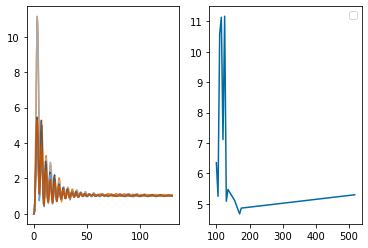

In [70]:
plt.subplot(1,2,1)
for i in range(1,len(N_list),2):
    N = N_list[i]
    
    taulist, g2_theta_avg_all_configurations = get_averaged_in_theta_g2(experiments_by_N[i])
    
    in_plane_average = np.average([np.abs(get_g2_from_experiment_and_angle(experiments_by_N[i], run_num, 0, double_excitation_dynamics = True)) 
                                 for run_num in range(len(experiments))],axis = 0)

    plt.plot(taulist*26, g2_theta_avg_all_configurations[1], label = N)
    
    #plt.plot(taulist[:50]*26, in_plane_average[:50], "-o")
plt.subplot(1,2,2)


max_values = [np.max(get_averaged_in_theta_g2(experiments_by_N[i])[1]) for i in range(0,len(N_list),1)]
plt.plot(N_list,max_values )

plt.legend()

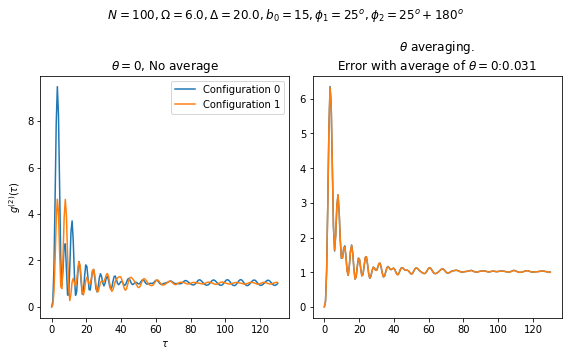

In [14]:
fig = plt.figure(figsize = (8,5))
plt.subplot(1,2,1)
plt.suptitle(f" $ N = {N}, \Omega = {Omega}, \Delta = {Delta}, b_0 = {b0} , \phi_1 = 25^o, \phi_2 = 25^o+180^o $ ", size = "large")

taulist, g2_theta_avg_all_configurations = get_averaged_in_theta_g2(experiments)

for run_num in range(0, len(experiments)):
    configuration = run_num
    g2_double_excitation_for_given_angle_and_configuration = np.abs(get_g2_from_experiment_and_angle(experiments, run_num, 0, double_excitation_dynamics = True)) 
    plt.plot(taulist*26, g2_double_excitation_for_given_angle_and_configuration, label = f"Configuration {run_num}")
    

plt.legend()
plt.title(r"$\theta = 0$, No average")
plt.ylabel(r"$g^{(2)}(\tau)$")
plt.xlabel(r"$\tau$")

plt.subplot(1,2,2)

  
for run_num in range(0, len(experiments)):
    configuration = run_num
    g2_theta_avg_for_given_configuration = g2_theta_avg_all_configurations[configuration]
    plt.plot(taulist*26, np.abs(g2_theta_avg_for_given_configuration), label = f"Configuration {run_num}")

in_plane_average = np.average([np.abs(get_g2_from_experiment_and_angle(experiments, run_num, 0, double_excitation_dynamics = True)) 
                                 for run_num in range(len(experiments))],axis = 0)

#plt.plot(taulist*26, in_plane_average, "-o")
 
#plt.ylim(0,3)
#plt.xlim(0,30)

relative_error_between_avg_of_theta_zero_and_theta_avg = relative_error(in_plane_average, g2_theta_avg_for_given_configuration) 

title = r"$\theta$ averaging." +  "\n" + r"Error with average of $\theta=0$:" + str(np.round(relative_error_between_avg_of_theta_zero_and_theta_avg, 3)) 


plt.title(title)
plt.tight_layout()

plt.savefig(f"showing_theta_averages_works_N{N}.png", dpi = 400)

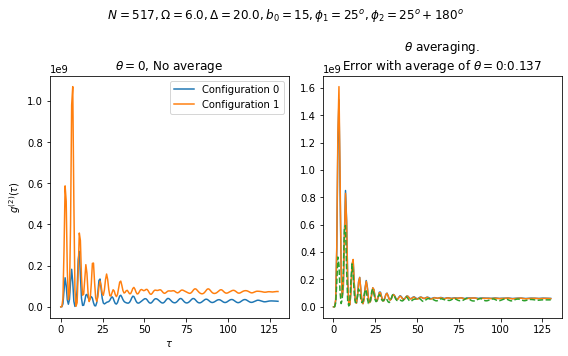

In [56]:
fig = plt.figure(figsize = (8,5))

plt.subplot(1,2,1)
plt.suptitle(f" $ N = {N}, \Omega = {Omega}, \Delta = {Delta}, b_0 = {b0} , \phi_1 = 25^o, \phi_2 = 25^o+180^o $ ", size = "large")

taulist, cs_theta_avg_all_configurations = get_averaged_in_theta_cs(experiments, single_excitation = False)

for run_num in range(0, len(experiments)):
    configuration = run_num
    cs_double_excitation_for_given_angle_and_configuration = np.abs(get_cs_from_experiment_and_angle(experiments, run_num, 0, double_excitation_dynamics = True)) 
    plt.plot(taulist*26, cs_double_excitation_for_given_angle_and_configuration, label = f"Configuration {run_num}")
    

plt.legend()
plt.title(r"$\theta = 0$, No average")
plt.ylabel(r"$g^{(2)}(\tau)$")
plt.xlabel(r"$\tau$")

plt.subplot(1,2,2)

  
for run_num in range(0, len(experiments)):
    configuration = run_num
    cs_double_excitation_for_given_angle_and_configuration = cs_theta_avg_all_configurations[configuration]
    plt.plot(taulist*26, np.abs(cs_double_excitation_for_given_angle_and_configuration), label = f"Configuration {run_num}")

in_plane_average = np.average([np.abs(get_cs_from_experiment_and_angle(experiments, run_num, 0, double_excitation_dynamics = True)) 
                                 for run_num in range(len(experiments))],axis = 0)

plt.plot(taulist*26, in_plane_average, "--")
 


relative_error_between_avg_of_theta_zero_and_theta_avg = relative_error(in_plane_average, cs_double_excitation_for_given_angle_and_configuration) 

title = r"$\theta$ averaging." +  "\n" + r"Error with average of $\theta=0$:" + str(np.round(relative_error_between_avg_of_theta_zero_and_theta_avg, 3)) 
plt.title(title)

plt.tight_layout()

plt.savefig(f"showing_theta_averages_works_N{N}.png", dpi = 400)

In [64]:
get_G2_MonteCarlo_from_experiment_and_angle(experiments, 0, 0, double_excitation_dynamics = True)

[(0.16991131283311783+0j),
 (95.76521823874731+6.54307337477622e-14j),
 (652.1963735498559+9.0068924540887e-13j),
 (1544.7524271577993-7.867706486308634e-12j),
 (2067.4228057985315-6.643699479447207e-12j),
 (1769.106771885813+6.412655129128808e-12j),
 (1009.1957950015458+1.450659037338653e-12j),
 (613.0666716814627-4.420352972545061e-13j),
 (1035.3723326009815+8.693046282814976e-14j),
 (1896.1897303535634+9.02244945422126e-12j),
 (2349.8681348853606-1.1400880239875733e-11j),
 (1906.10078139348-3.272215831628955e-12j),
 (908.561687982784+8.977540932875172e-13j),
 (238.95536840837352+8.483075353282743e-13j),
 (527.5630609070852-7.263634138610087e-13j),
 (1599.051427826399+1.0370038161511275e-12j),
 (2631.810164072843-1.3212320126854138e-11j),
 (2855.0385686740406+4.8386294970725885e-12j),
 (2158.5432348717363+1.2158385409577477e-11j),
 (1114.057149147822+1.5248358131714213e-12j),
 (450.0249474137887-1.8639950694065988e-12j),
 (475.5405007370262-9.800146805183374e-14j),
 (928.726633440588

In [62]:
get_I_MonteCarlo_same_direction_from_experiment_and_angle(experiments, 0, 0, double_excitation_dynamics = True)**2

(628599.1114549018-3.0203837833787323e-09j)

In [65]:
get_I_MonteCarlo_from_experiment_and_angle(experiments, 0, 0, double_excitation_dynamics = True)**2

(799527.1920045626-6.10128302849152e-09j)